In [ ]:
from typing import Tuple, Dict, Optional, Iterable

import gym
from gym import spaces
from gym.error import DependencyNotInstalled

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation
from matplotlib import animation

from IPython.display import HTML

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env = gym.make('Taxi-v3')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
initial_state = env.reset()
print(f"The new episode will start in state: {initial_state}")

The new episode will start in state: 213


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


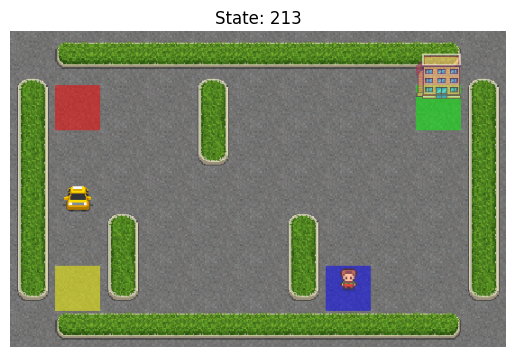

In [ ]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {initial_state}")
plt.imshow(frame)

In [ ]:
action = 2
next_state, reward, done, info = env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print("After moving down 1 row, the task is", "" if done else "not", "finished")

After moving down 1 row, the agent is in state: 233
After moving down 1 row, we got a reward of: -1
After moving down 1 row, the task is not finished


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


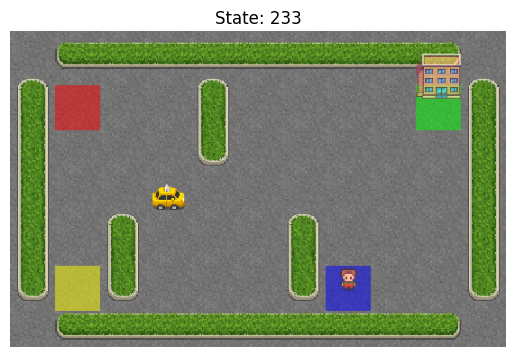

In [ ]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {next_state}")
plt.imshow(frame)

In [ ]:
env.close()

In [ ]:
env=gym.make('Taxi-v3')

In [ ]:
print(f"For example, the initial state is: {env.reset()}")
print(f"The space state is of type: {env.observation_space}")

For example, the initial state is: 34
The space state is of type: Discrete(500)


In [ ]:
print(f"An example of a valid action is: {env.action_space.sample()}")
print(f"The action state is of type: {env.action_space}")

An example of a valid action is: 1
The action state is of type: Discrete(6)


In [ ]:
state = env.reset()
trajectory = []
for _ in range(3):
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    trajectory.append([state, action, reward, done, next_state])
    state = next_state
env.close()

print(f"Congrats! You just generated your first trajectory:\n{trajectory}")

Congrats! You just generated your first trajectory:
[[88, 4, -10, False, 88], [88, 4, -10, False, 88], [88, 5, -10, False, 88]]


In [ ]:
state = env.reset()
episode = []
done = False
while not done:
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    episode.append([state, action, reward, done, next_state])
    state = next_state
env.close()

print(f"Congrats! You just generated your first episode:\n{episode}")

Congrats! You just generated your first episode:
[[294, 0, -1, False, 394], [394, 5, -10, False, 394], [394, 5, -10, False, 394], [394, 2, -1, False, 394], [394, 0, -1, False, 494], [494, 0, -1, False, 494], [494, 2, -1, False, 494], [494, 0, -1, False, 494], [494, 5, -10, False, 494], [494, 0, -1, False, 494], [494, 2, -1, False, 494], [494, 5, -10, False, 494], [494, 2, -1, False, 494], [494, 0, -1, False, 494], [494, 5, -10, False, 494], [494, 4, -10, False, 494], [494, 4, -10, False, 494], [494, 1, -1, False, 394], [394, 5, -10, False, 394], [394, 1, -1, False, 294], [294, 1, -1, False, 194], [194, 2, -1, False, 194], [194, 3, -1, False, 174], [174, 4, -10, False, 174], [174, 4, -10, False, 174], [174, 5, -10, False, 174], [174, 2, -1, False, 194], [194, 1, -1, False, 94], [94, 4, -10, False, 94], [94, 1, -1, False, 94], [94, 0, -1, False, 194], [194, 3, -1, False, 174], [174, 2, -1, False, 194], [194, 2, -1, False, 194], [194, 0, -1, False, 294], [294, 0, -1, False, 394], [394, 0,

In [ ]:
state = env.reset()
action = env.action_space.sample()
_, reward, _, _ = env.step(action)
print(f"We achieved a reward of {reward} by taking action {action} in state {state}")

We achieved a reward of -10 by taking action 4 in state 107


In [ ]:
state = env.reset()
done = False
gamma = 0.99
G_0 = 0
t = 0
while not done:
    action = env.action_space.sample()
    _, reward, done, _ = env.step(action)
    G_0 += gamma ** t * reward
    t += 1
env.close()

print(
    f"""It took us {t} moves to find the exit,
    and each reward r(s,a)=-1, so the return amounts to {G_0}""")

It took us 200 moves to find the exit,
    and each reward r(s,a)=-1, so the return amounts to -308.02838049670146


In [ ]:
def random_policy(state):
    return np.array([1.0/6] * 6)

In [ ]:
env = gym.make('Taxi-v3')
state = env.reset()

In [ ]:
action_probs = random_policy(state)

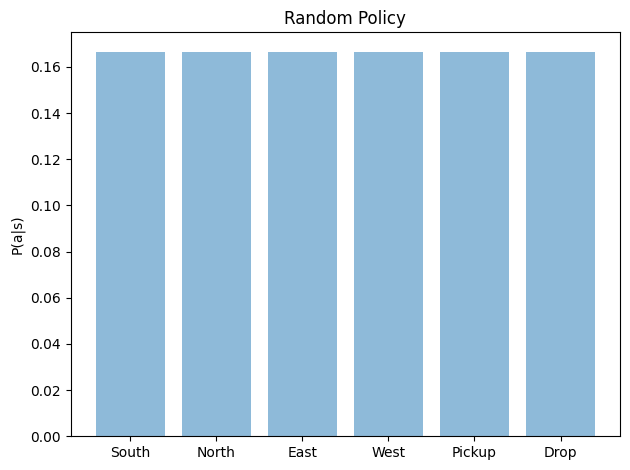

In [ ]:
objects = ('South', 'North', 'East', 'West', 'Pickup', 'Drop')
y_pos = np.arange(len(objects))

plt.bar(y_pos, action_probs, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('P(a|s)')
plt.title('Random Policy')
plt.tight_layout()

plt.show()

In [ ]:
def display_video(frames):
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    matplotlib.use(orig_backend)
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])
    def update(frame):
        im.set_data(frame)
        return [im]
    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                    interval=50, blit=True, repeat=False)
    return HTML(anim.to_html5_video())


In [ ]:
def test_agent(env, policy):
    frames = []
    state = env.reset()
    done = False
    frames.append(env.render(mode="rgb_array"))

    while not done:
        action_probs = policy(state)
        action = np.random.choice(range(len(action_probs)), p=action_probs)  # Ensure action is a scalar
        next_state, reward, done, extra_info = env.step(action)
        frame = env.render(mode="rgb_array")
        frames.append(frame)

        state = next_state

    return display_video(frames)


# Example usage:
test_agent(env, random_policy)
